# Basic Root Locus Design
## Topic 10 - RL design

In [26]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found


## Analyze impact of adding Integrator


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.385
At possible locations s = -0.423


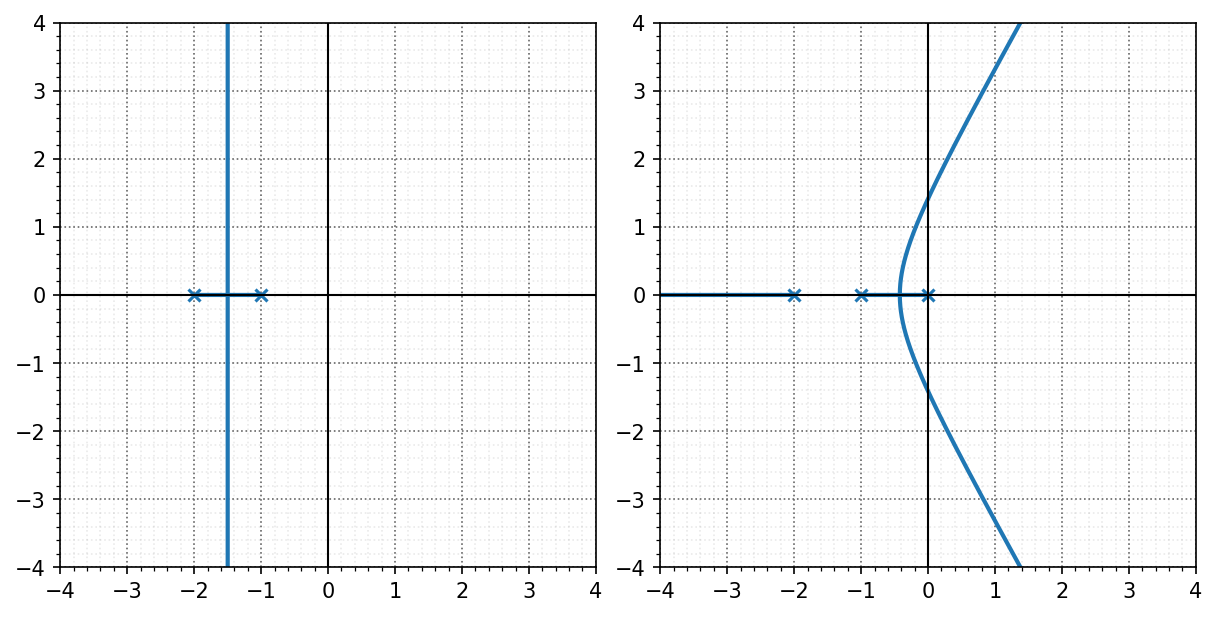

In [27]:
G0 = tf(1, (1,3,2))

# pole to the left
G1 = G0*tf((0, 1), (1, 0))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_1.pdf", dpi=600)
plt.show()

## Analyze impact of adding PI


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.151
At possible locations s = -0.468


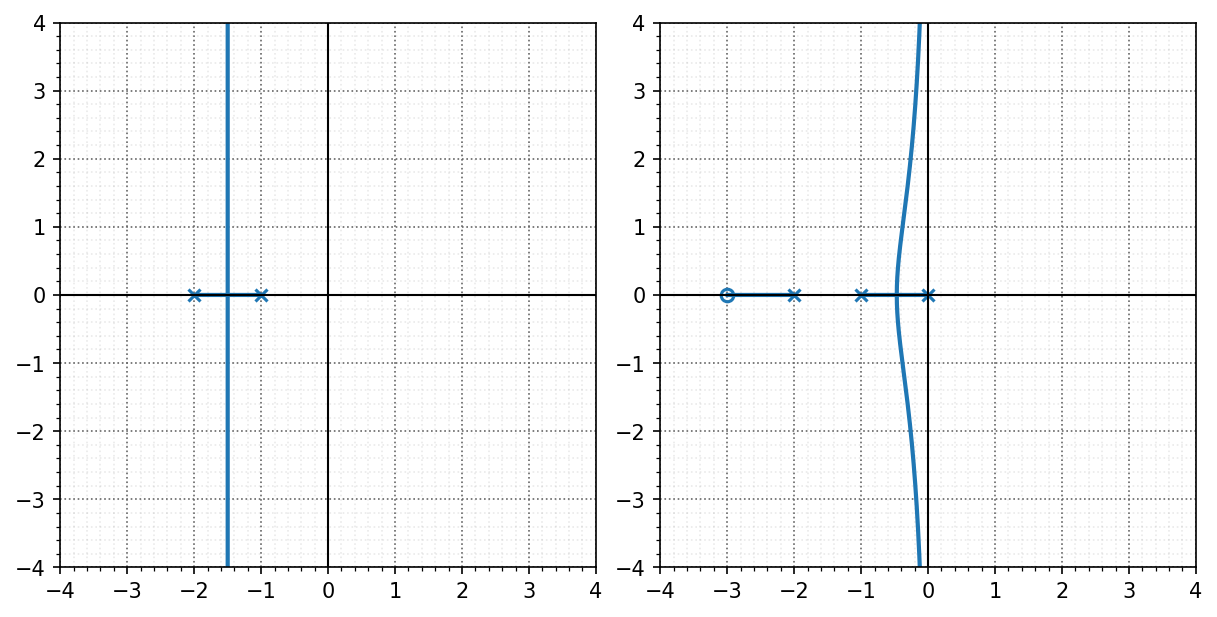

In [28]:
G1 = G0*tf((1, 3), (1, 0))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_2.pdf", dpi=600)
plt.show()

## Analyze impact of adding D


Found breakin/out at K = 0.250
At possible locations s = 1.500

Found breakin/out at K = 0.172
At possible locations s = 1.414

Found breakin/out at K = 5.828
At possible locations s = -1.414


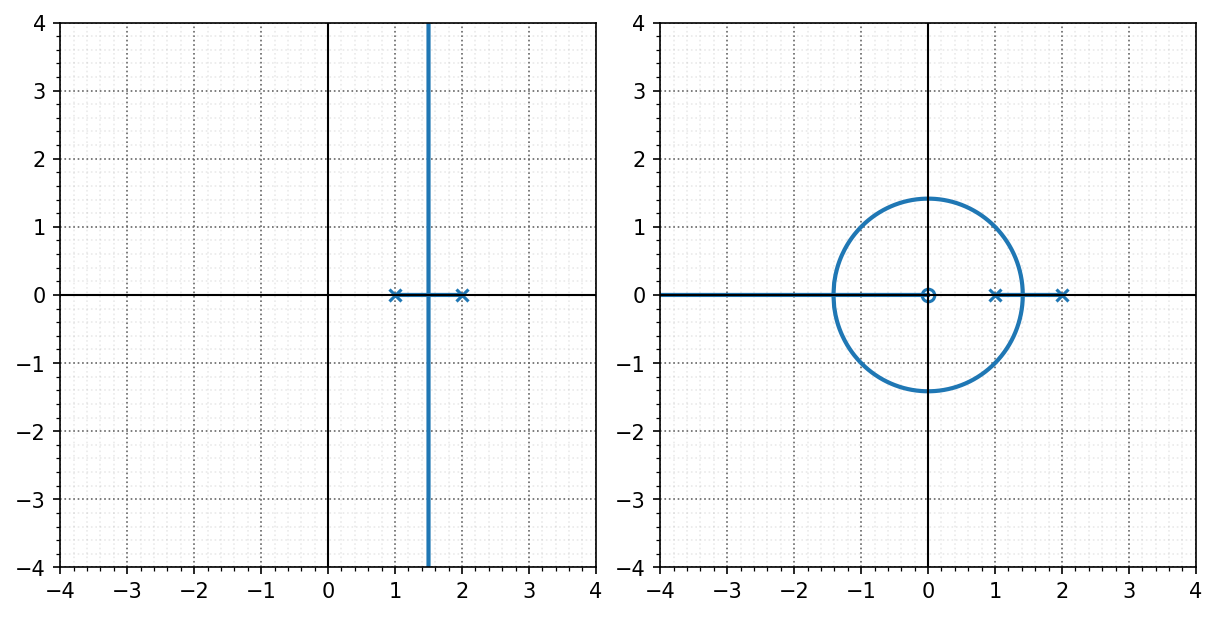

In [29]:
G0 = tf(1, (1,-3,2))
G1 = G0*tf((1, 0), (1))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_3.pdf", dpi=600)
plt.show()

## Analyze impact of adding PD


Found breakin/out at K = 0.250
At possible locations s = 1.500

Found breakin/out at K = 9.899
At possible locations s = -3.449

Found breakin/out at K = 0.101
At possible locations s = 1.449


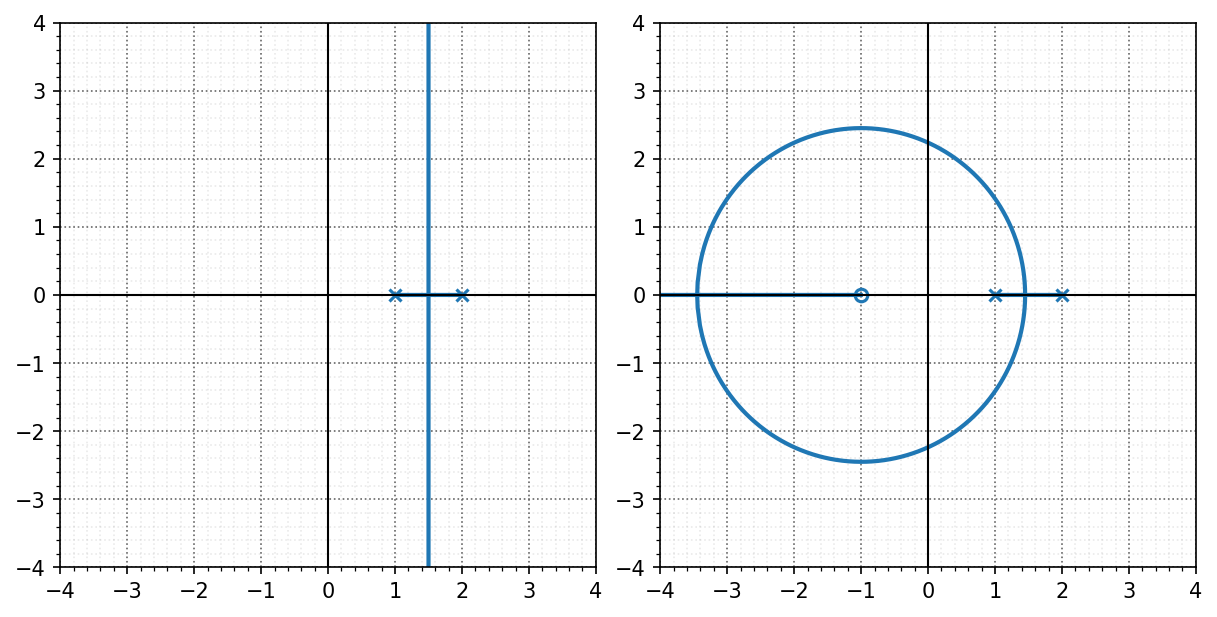

In [30]:
G0 = tf(1, (1,-3,2))
G1 = G0*tf((1, 1), (1))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_4.pdf", dpi=600)
plt.show()

## Use filter to avoid high frequency issue with PD

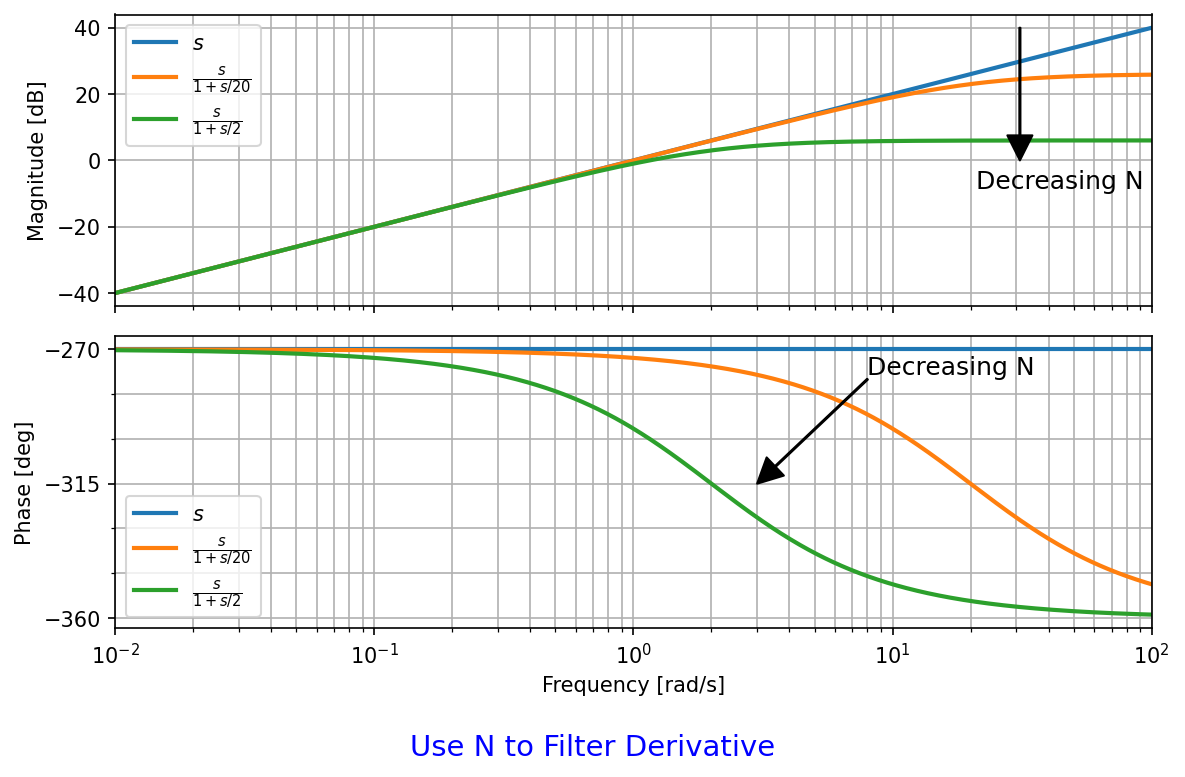

In [31]:
w = np.logspace(-2, 2, 1000)
G_deriv = tf((1,0), (0,1))
G_deriv_2 = tf((1,0), (1/2,1))
G_deriv_20 = tf((1,0), (1/20,1))
fig, ax = plt.subplots(2,1,figsize=(8, 5),dpi=150,constrained_layout = True)
Gfreq = bode(G_deriv,w,plot=True)
Gfreq20 = bode(G_deriv_20,w,plot=True)
Gfreq2 = bode(G_deriv_2,w,plot=True)
ax1,ax2 = plt.gcf().axes
ax1.legend((r'$s$',r'$\frac{s}{1+s/20}$',r'$\frac{s}{1+s/2}$'))
ax2.legend((r'$s$',r'$\frac{s}{1+s/20}$',r'$\frac{s}{1+s/2}$'))
ax1.annotate('',xy=(31, 0), xytext=(31, 40), 
            arrowprops=dict(facecolor='black', shrink=0., width=0.5),
            )
ax2.annotate('', xy=(3, -315), xytext=(8, -280), 
            arrowprops=dict(facecolor='black', shrink=0., width=0.5),
            )
ax1.text(21, -10, 'Decreasing N', fontsize=12, verticalalignment='bottom')
ax2.text(8, -280, 'Decreasing N', fontsize=12, verticalalignment='bottom')
caption("Use N to Filter Derivative",fig)
savefig("./figs/L12_5.pdf", dpi=600)


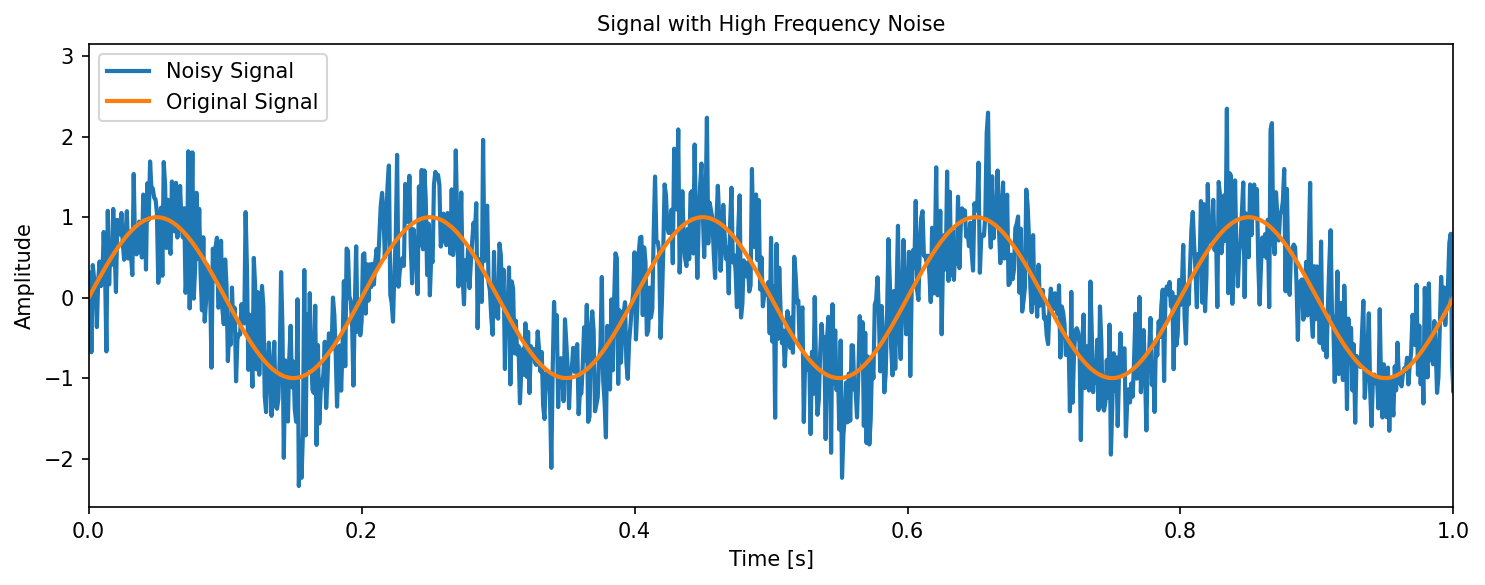

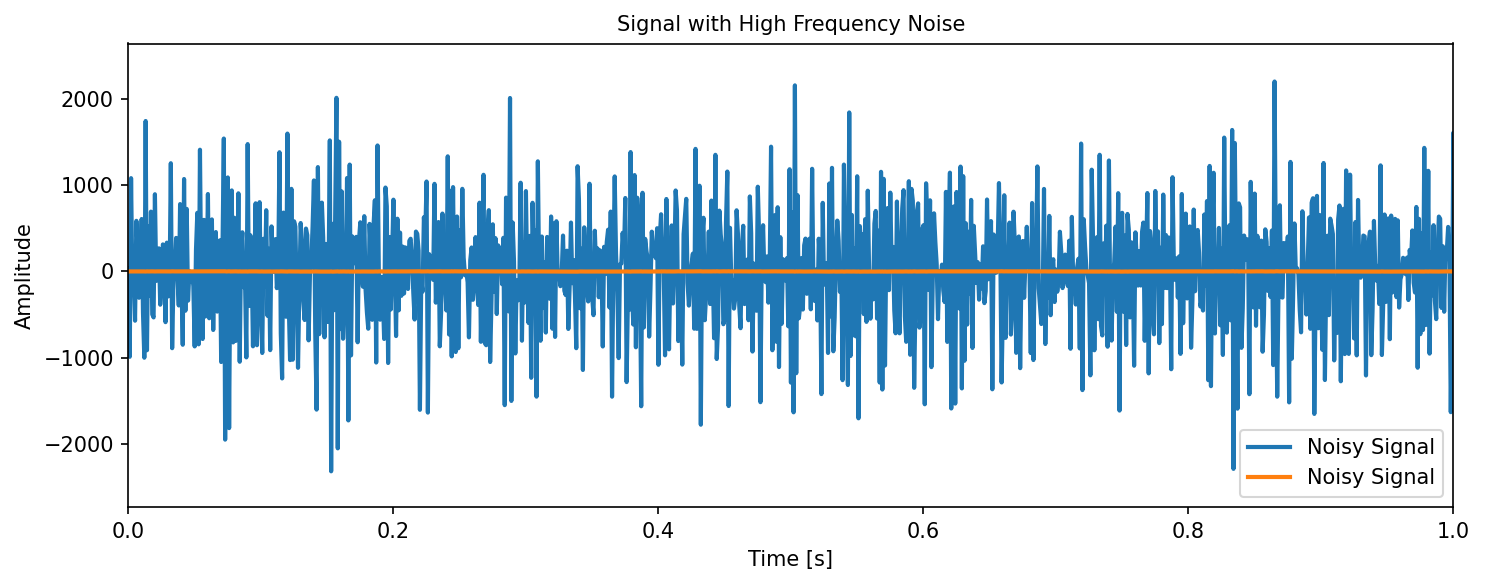

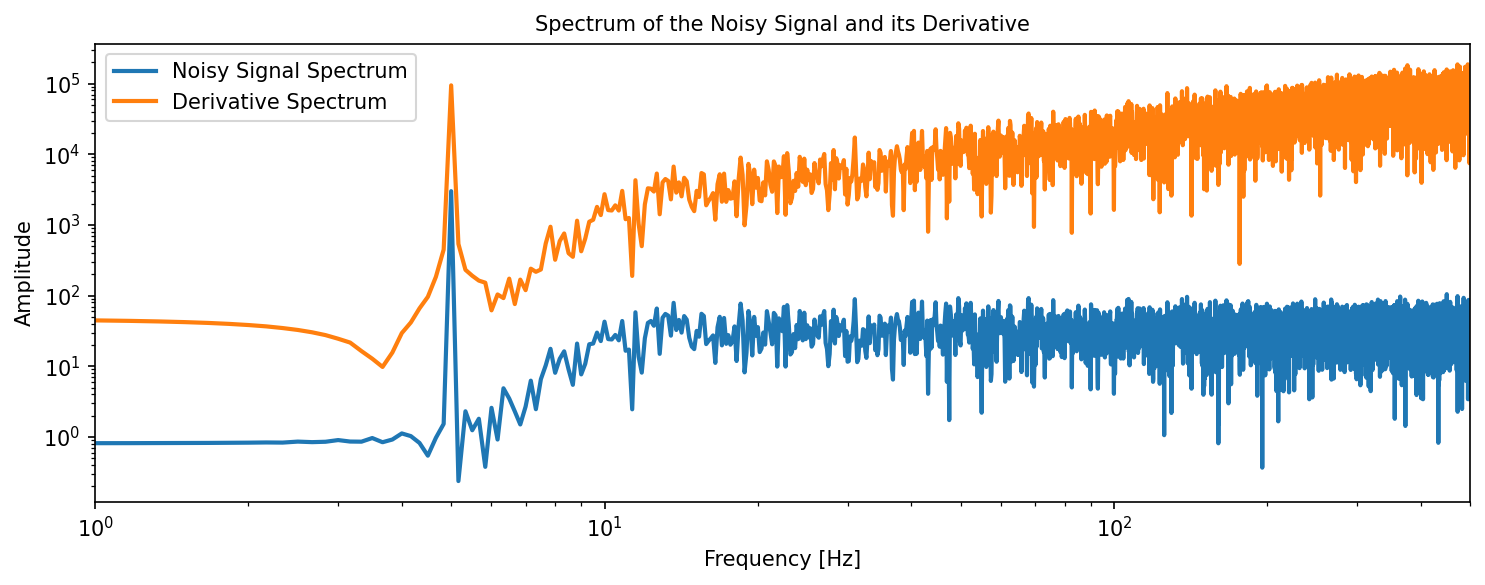

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Create a time vector
dt = 0.001  # Time step
t = np.arange(0, 6, dt)  # Time vector
N = len(t)  # Number of samples
frequencies = np.fft.fftfreq(N, dt)  # Frequency vector

# Create a signal (e.g., a sine wave)
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
# Design a high-pass filter
b, a = butter(6, 10, btype='high', fs=1/dt)  # 4th order Butterworth filter with 100 Hz cutoff
# Generate high frequency noise
noise = 0.5 * np.random.randn(len(t))  # Gaussian noise
# Apply the high-pass filter to the noise
filtered_noise = lfilter(b, a, noise)

# Add the filtered noise to the signal
noisy_signal = signal + filtered_noise
derivative_noisy_signal = np.diff(noisy_signal) / np.diff(t)

spectrum = np.fft.fft(noisy_signal)
spectrum_derivative = np.fft.fft(derivative_noisy_signal)

Nf = len(spectrum_derivative)
Ns = len(spectrum)

# Plot the noisy signal
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', linewidth=2)
plt.xlabel('Time [s]')
plt.xlim(0,1)
plt.ylabel('Amplitude')
plt.title('Signal with High Frequency Noise')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t[:-1], derivative_noisy_signal, label='Noisy Signal')
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal with High Frequency Noise')
plt.xlim(0,1)
plt.legend()
plt.grid()
plt.show()

# Compute the Fourier Transform of the derivative of the noisy signal
# Plot the spectrum of the noisy signal and its derivative
plt.figure(figsize=(10, 4))
plt.loglog(frequencies[:-(Ns//2)], np.abs(spectrum)[:-(Ns//2)], label='Noisy Signal Spectrum')
plt.loglog(frequencies[:-(Nf//2+1)], np.abs(spectrum_derivative)[:-(Nf//2)], label='Derivative Spectrum')
plt.xlim(1, 1/dt/2)  # Limit x-axis to positive frequencies
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum of the Noisy Signal and its Derivative')
plt.legend()
plt.grid()
plt.show()